# Check Gr(t) frequncy

We simulate the same oscillation when no pulse/pulse turn off in CDW model here, and check the frequency of oscillation

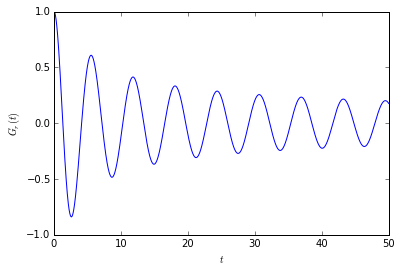

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
%matplotlib inline

eps = np.linspace(0, np.pi, 1000)
U = 1.
t = 1.
den = np.exp(-(eps/t)**2)
den = den / sum(den)

Ttot = 100
dt = .01

wm = np.sqrt(eps**2 + U**2)
tim = np.linspace(0,Ttot,Ttot/dt)


den_t = den.reshape(len(den),1)*np.ones(len(tim)).reshape(1,len(tim))
expiwt = np.exp(1j*wm.reshape(len(wm),1)*tim.reshape(1,len(tim)))

ans = np.sum(den_t*expiwt, axis = 0)
lon = len(ans)
plt.plot(tim[:lon/2], ans[:lon/2].real)
plt.xlabel('$t$')
plt.ylabel('$G_r(t)$')
plt.show()


[  90.0090009    91.11911191   92.22922292   93.33933393   94.44944494
   95.55955596   96.66966697   97.77977798   98.88988899  100.        ]


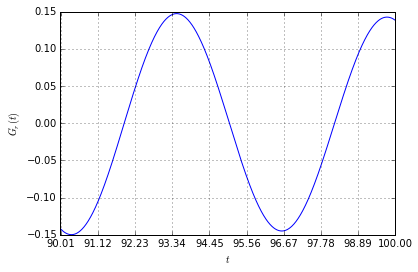

In [3]:
plt.plot(tim[-1000:],ans[-1000:])
ticks = np.linspace(tim[-1000],tim[-1],10)
print ticks
plt.xticks(ticks)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$G_r(t)$')
plt.show()

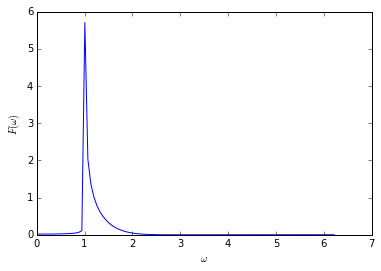

In [56]:

pbf = np.fft.rfft(ans)*dt/2
freq = np.fft.rfftfreq(lon, dt)*2*np.pi
plt.plot(freq[:100],pbf[:100])
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')
plt.show()


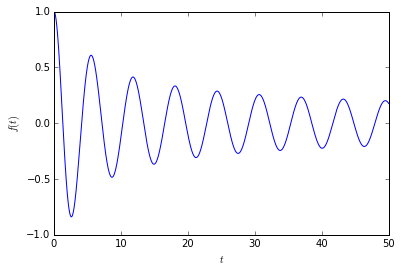

5000


In [59]:
#pbf = np.append(pbf, np.zeros(lon))
pbfr = np.fft.irfft(pbf)*2/dt#*np.pi
freqr = np.fft.rfftfreq(lon,dt)
plt.plot(freqr[:lon/2+1],pbfr[:lon/2+1])
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
#plt.ylim(-1,1)
plt.show()
print len(pbfr[:lon/2])

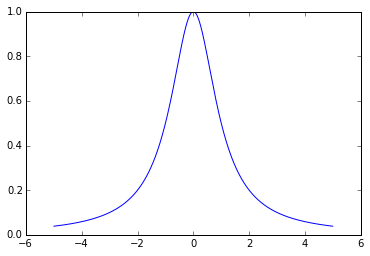

In [6]:
ft = lambda ti, sd, amp : amp*(1/sd)/(ti**2+1/sd**2)
ft2 = lambda ti, sd, amp : amp*-1/(1j*ti-1/sd)
ti_i = np.linspace(-Ttot,Ttot, 2*Ttot/dt) 
sd_i = 1.
amp_i = 1.
y = ft2(ti_i, sd_i, amp_i)
Nce = 10000
Nff = 500
plt.plot(ti_i[Nce-Nff:Nce+Nff], y[Nce-Nff:Nce+Nff])
plt.show()